In [ ]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [18]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [19]:
tokens = tokenize(text)


In [20]:
tokens

['machine',
 'learning',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'it',
 'is',
 'seen',
 'as',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build',
 'a',
 'mathematical',
 'model',
 'based',
 'on',
 'sample',
 'data',
 'known',
 'as',
 'training',
 'data',
 'in',
 'order',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'being',
 'explicitly',
 'programmed',
 'to',
 'do',
 'so',
 'machine',
 'learning',
 'algorithms',
 'are',
 'used',
 'in',
 'a',
 'wide',
 'variety',
 'of',
 'applications',
 'such',
 'as',
 'email',
 'filtering',
 'and',
 'computer',
 'vision',
 'where',
 'it',
 'is',
 'difficult',
 'or',
 'infeasible',
 'to',
 'develop',
 'conventional',
 'algorithms',
 'to',
 'perform',
 'the',
 'needed',
 'tasks']

In [21]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [22]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'tasks': 0,
 'variety': 1,
 'as': 2,
 'predictions': 3,
 'that': 4,
 'needed': 5,
 'a': 6,
 'automatically': 7,
 'data': 8,
 'wide': 9,
 'do': 10,
 'sample': 11,
 'artificial': 12,
 'seen': 13,
 'to': 14,
 'or': 15,
 'applications': 16,
 'intelligence': 17,
 'in': 18,
 'such': 19,
 'training': 20,
 'build': 21,
 'mathematical': 22,
 'learning': 23,
 'on': 24,
 'machine': 25,
 'so': 26,
 'email': 27,
 'infeasible': 28,
 'are': 29,
 'filtering': 30,
 'subset': 31,
 'improve': 32,
 'make': 33,
 'algorithms': 34,
 'used': 35,
 'where': 36,
 'known': 37,
 'is': 38,
 'vision': 39,
 'study': 40,
 'and': 41,
 'of': 42,
 'develop': 43,
 'decisions': 44,
 'without': 45,
 'experience': 46,
 'model': 47,
 'the': 48,
 'it': 49,
 'based': 50,
 'difficult': 51,
 'perform': 52,
 'computer': 53,
 'programmed': 54,
 'conventional': 55,
 'being': 56,
 'through': 57,
 'order': 58,
 'explicitly': 59}

In [23]:
import numpy as np

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

def concat(*iterables):
    for iterable in iterables:
        yield from iterable
        
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [24]:
X, y = generate_training_data(tokens, word_to_id, 2)

In [26]:
X.shape, y.shape

((330, 60), (330, 60))

In [27]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    
    return model


In [28]:
model = init_network(len(word_to_id), 10)

In [29]:
model["w1"].shape, model["w2"].shape

((60, 10), (10, 60))

In [31]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res


def backward(model, X, y, alpha):
    cache = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)


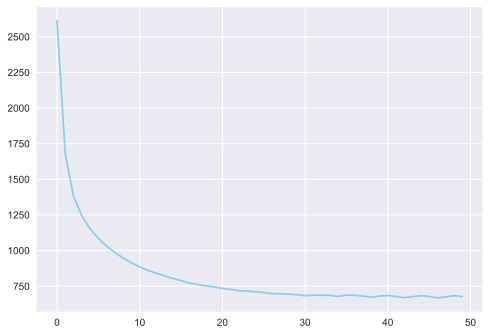

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.style.use("seaborn")

n_iter = 50
lr = 0.05

history = [backward(model, X, y, lr) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [33]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

machine
build
intelligence
are
so
the
algorithms
is
conventional
develop
or
infeasible
subset
computer
perform
wide
used
email
seen
make
variety
learning
improve
to
applications
decisions
of
without
tasks
do
artificial
that
explicitly
being
through
data
in
study
predictions
difficult
order
it
known
needed
vision
filtering
experience
a
and
such
automatically
mathematical
programmed
based
on
model
where
training
as
sample


In [34]:
model["w1"]

array([[-1.96510252e-01, -9.21310265e-01, -1.62989065e+00,
         1.58489966e+00,  2.47515351e-01, -1.14055504e+00,
         1.02397019e+00,  1.08020914e+00, -1.61255143e-01,
         1.25055676e+00],
       [-7.56698764e-01, -9.16227779e-01,  1.20500341e+00,
        -2.14235203e+00, -1.64101465e+00,  8.81009834e-01,
        -1.72763293e+00,  2.40556674e-01, -4.01303908e-01,
        -1.44286208e+00],
       [-8.93238424e-01, -1.84537361e+00, -8.51735625e-01,
         1.61003624e-01, -7.29778076e-01,  1.92407683e+00,
        -2.63961968e-01,  8.88889035e-01, -2.90501819e-01,
        -1.30259951e+00],
       [ 1.17379310e+00,  8.69645033e-01,  9.22865868e-01,
        -9.14566036e-01,  1.02558035e+00, -1.80782619e+00,
        -1.03120221e+00, -8.55641776e-01, -9.73291245e-01,
        -1.16357418e-01],
       [-1.44727479e+00,  1.45673755e+00,  6.92555229e-01,
         1.29956469e+00, -3.33776521e-01,  1.70389736e-01,
        -3.73334347e-01, -5.05606873e-01, -2.78013987e-01,
        -1.

In [35]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [36]:
get_embedding(model, "machine")

array([-1.52365966,  2.26600602, -0.12181513,  0.01030432, -0.62413079,
       -0.53447347,  0.54689685, -0.53766788, -0.31546845,  0.95315643])

## Vietnamese pretrained

In [4]:
from __future__ import unicode_literals
import plac
import numpy

import spacy
from spacy.language import Language
import gzip
import shutil
from gensim.models import Word2Vec, KeyedVectors
import os

# Get it from https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.vi.vec
vectors_gzip = "./weights/wiki.vi.model.bin.gz"
vectors_loc="./weights/wiki.vi.model.bin"
if not os.path.exists(vectors_loc):
    with gzip.open(vectors_gzip, 'rb') as f_in:
        with open(vectors_loc, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

model = KeyedVectors.load_word2vec_format(vectors_loc, binary=True)


In [20]:
model["tròn"].shape

(400,)

In [14]:
import gensim

In [13]:
model["yeah"]

array([ 1.67742801e+00, -3.80766273e-01, -3.81848395e-01,  2.02726021e-01,
        5.84715679e-02,  2.14065641e-01, -2.39442393e-01, -2.14341730e-02,
        3.97520095e-01,  2.04711761e-02,  1.03118688e-01,  1.37950003e-01,
       -3.12578708e-01,  6.10598385e-01, -9.40513253e-01, -1.27834931e-01,
        1.71052977e-01,  3.59351754e-01, -8.53107944e-02,  3.61341655e-01,
       -8.67187083e-01,  6.82159543e-01, -1.36353701e-01,  3.58655214e-01,
        8.20614398e-01,  6.16787672e-01,  2.73643255e-01, -6.87171042e-01,
       -3.67918134e-01, -2.61691898e-01,  2.93788314e-01,  2.26139694e-01,
       -6.81671500e-01, -1.37907565e-01,  1.96616516e-01,  5.77462018e-01,
       -6.31977201e-01,  5.49481869e-01,  2.39967600e-01, -4.47822124e-01,
        6.19713701e-02,  3.79401326e-01, -1.27397075e-01, -9.95484218e-02,
       -1.48831582e+00,  2.52691120e-01,  2.13965803e-01, -1.47712052e-01,
       -3.26888472e-01, -1.98141616e-02, -7.25047350e-01,  2.84598380e-01,
       -1.65419668e-01,  